# Olympics DataSet Analysis

The ‘dataset on the modern Olympic Games’ comprises all the Games from Athens 1986 to Rio 2016. The Olympics is more than just a quadrennial multi-sport world championship. It is a lens through which to understand global history, including shifting geopolitical power dynamics, women’s empowerment, and the evolving values of society.In this analysis, our goal is to shed light on major patterns in Olympic history.How many athletes, sports, and nations are there? Where do most athletes come from? Who wins medals? What are the characteristic of the athletes (e.g., gender and physical size)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import collections
import scipy.stats
import seaborn as sns

Reading the data provide in dataSet

In [2]:
dfo = pd.read_csv('olympics.csv')

In [3]:
olympics = dfo.copy()

In [4]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
olympics.shape

(271116, 17)

In [6]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Checking the null values 

In [7]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

<Axes: >

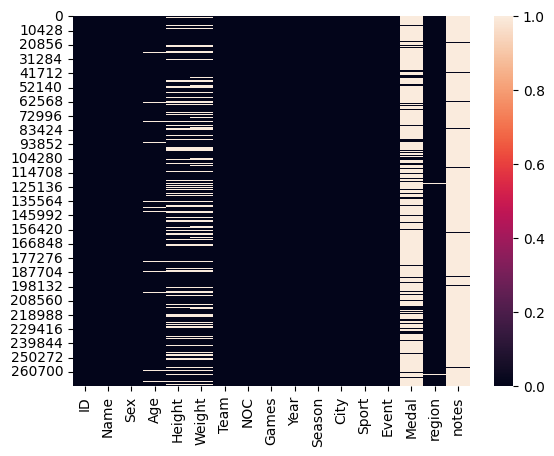

In [8]:
sns.heatmap(olympics.isnull())

In [9]:
olympics.duplicated().sum()

1385

### Handling null values

In [10]:
### We don't require these columns in our analysis 
olympics.drop(columns=["notes", "Height", "Weight"],axis = 0, inplace=True)


In [11]:
olympics = olympics[pd.notnull(olympics['region'])]

In [12]:
### replacing null values of Medal with DNW i.e., DID NOT WIN
olympics['Medal'].fillna('DNW',inplace = True)

In [13]:
### Age is a very crucial Factor in Games so we are replacing null/na with average of Age column
olympics["Age"].fillna(olympics.groupby("Sport")['Age'].transform('mean'),inplace=True) 

<Axes: >

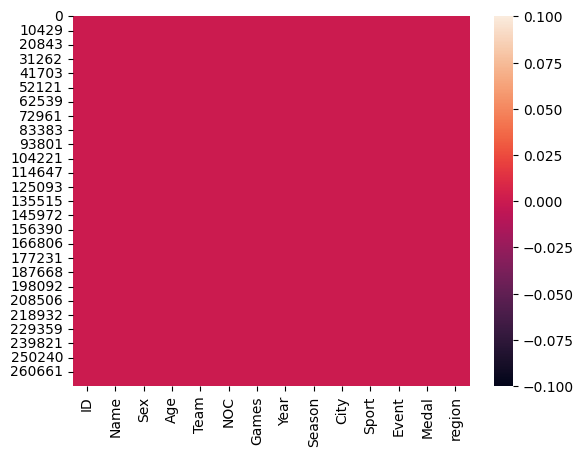

In [14]:
sns.heatmap(olympics.isnull())

In [15]:
olympics.duplicated().sum() 

1385

In [16]:
olympics = olympics.drop_duplicates(keep = False)

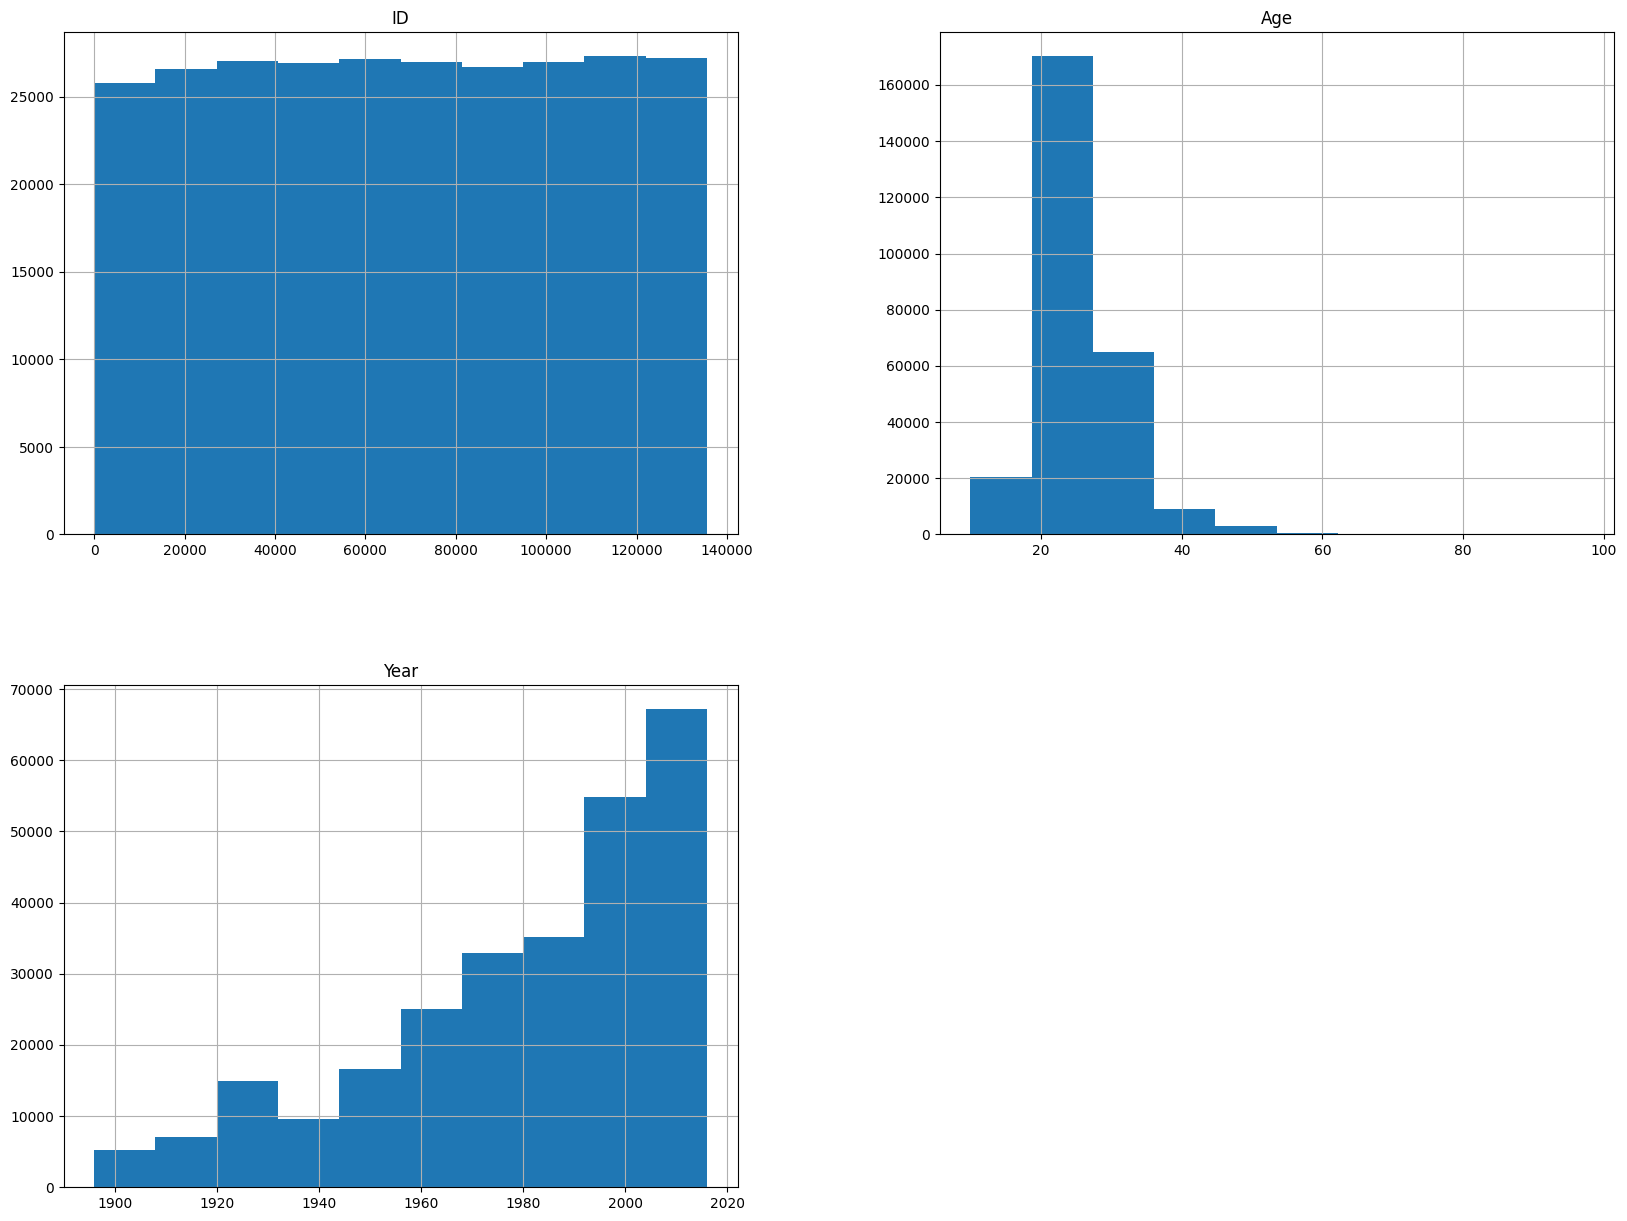

In [17]:
olympics.hist(figsize = (20,15))
plt.show()

In [18]:
olympics['Sex'].replace({'F':'Female','M':'Male'},inplace = True)

In [19]:
olympics.shape

(268749, 14)

### Counting Medals

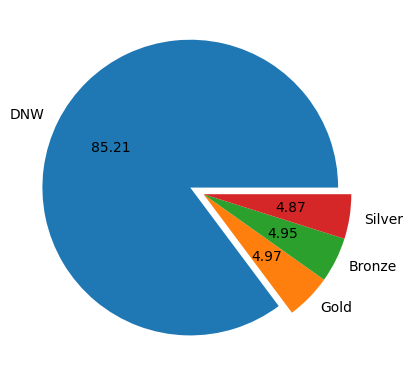

In [20]:
medal_count = olympics['Medal'].value_counts()
medal_count = dict(medal_count)
plt.pie(medal_count.values(),labels = medal_count.keys(),autopct = '%0.2f',explode = [0.1,0,0,0])
plt.show()

### Medals won by Male versus Female

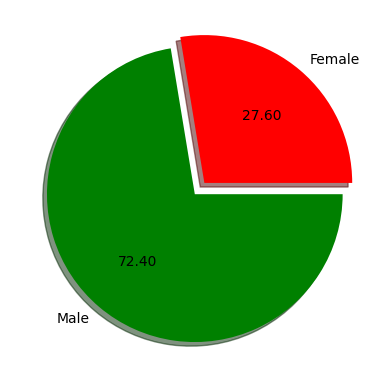

In [21]:
won_by_Female = olympics[olympics['Sex'] == 'Female']['Medal'].count()
won_by_Male = olympics[olympics['Sex'] == 'Male']['Medal'].count()
total_won = [won_by_Female,won_by_Male]
plt.pie(total_won,labels = ['Female','Male'],colors = ['red','green'],explode = [0.1,0],
        autopct = '%0.2f',shadow = True
       )
plt.show()

### Participation of Countries

In [22]:
olympics.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,Male,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,Male,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,Male,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,Female,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


In [23]:
country_part = olympics['Team'].value_counts().sort_values(ascending = False)

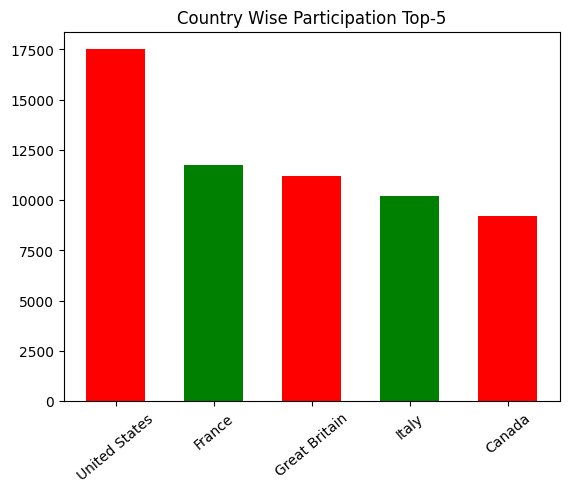

In [24]:
d = dict(country_part[0:5])
plt.bar(d.keys(),d.values(), width = 0.6, color = ['red', 'green'])
plt.title("Country Wise Participation Top-5")
plt.xticks(rotation = 40)
plt.show()